In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TRAIN_CHURN.csv')
pd.set_option('display.max_columns',None)

df1 = pd.read_csv('TEST_CHURN.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
# checking unique values from these two columns.
# turns out both have 'nan' type data

print(f"region category unique = {df['region_category'].unique()}")
print(f"offer types unique = {df['preferred_offer_types'].unique()}")

region category unique = ['Village' 'City' 'Town' nan]
offer types unique = ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]


In [5]:
# checking the proportion of 'nan' at 'Region Category' column

print(df.region_category.value_counts(normalize=True, dropna=False))

Town       0.381920
City       0.344318
NaN        0.146734
Village    0.127027
Name: region_category, dtype: float64


In [6]:
# checking the proportion of 'nan' at 'Region Category' column

print(df.preferred_offer_types.value_counts(normalize=True, dropna=False))

Gift Vouchers/Coupons       0.333829
Credit/Debit Card Offers    0.331801
Without Offers              0.326584
NaN                         0.007785
Name: preferred_offer_types, dtype: float64


In [7]:
# checking all-over data
# turns out dataset's row is imbalanced, not just two of the above.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [8]:
# checking the dependent variable (Y) values
# is there any -1 rating?

df['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [9]:
# replacing null or nan data with the majority (I checked already)

df['region_category'].replace({np.NaN:'Town'},inplace=True)
df['preferred_offer_types'].replace({np.NaN:'Gift Vouchers/Coupons'},inplace=True)

df1['region_category'].replace({np.NaN:'Town'},inplace=True)
df1['preferred_offer_types'].replace({np.NaN:'Gift Vouchers/Coupons'},inplace=True)

In [10]:
# checking any null or nan data

df.isna().any()

customer_id                     False
Name                            False
age                             False
gender                          False
security_no                     False
region_category                 False
membership_category             False
joining_date                    False
joined_through_referral         False
referral_id                     False
preferred_offer_types           False
medium_of_operation             False
internet_option                 False
last_visit_time                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                 True
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
dtype: bool

In [11]:
# dataset's row is balanced now (except 'points_in_wallet', we'll get down to it later)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

**DATA PRE-PROCESSING**

Gender Column

In [12]:
# one-hot-encoding this column because the data type is categorical

pd.get_dummies(df, columns=['gender'], prefix='', prefix_sep='').head()

pd.get_dummies(df1, columns=['gender'], prefix='', prefix_sep='').head()


,customer_id,Name,age,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,F,M,Unknown
0,fffe43004900440031003700300030003400,Alethia Meints,50,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,07:19:30,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality,1,0,0
1,fffe43004900440031003900370037003300,Ming Lopez,41,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,Without Offers,Desktop,Fiber_Optic,22:21:16,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website,0,1,0
2,fffe43004900440034003800360037003000,Carina Flannigan,31,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,Gift Vouchers/Coupons,Both,Mobile_Data,16:40:39,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified,1,0,0
3,fffe43004900440036003200370033003400,Kyung Wanner,64,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,Credit/Debit Card Offers,?,Fiber_Optic,14:56:17,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads,0,1,0
4,fffe43004900440035003000370031003900,Enola Gatto,16,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,Without Offers,Smartphone,Mobile_Data,02:57:53,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website,1,0,0


In [13]:
# turns out there are 'unknown' data

df['gender'].value_counts(normalize=True)

F          0.499838
M          0.498567
Unknown    0.001595
Name: gender, dtype: float64

In [14]:
# replacing the 'unknown' data with the majority data

df['gender'].replace({'Unknown':'F'},inplace=True)
df1['gender'].replace({'Unknown':'F'},inplace=True)

df['gender'].value_counts()

F    18549
M    18443
Name: gender, dtype: int64

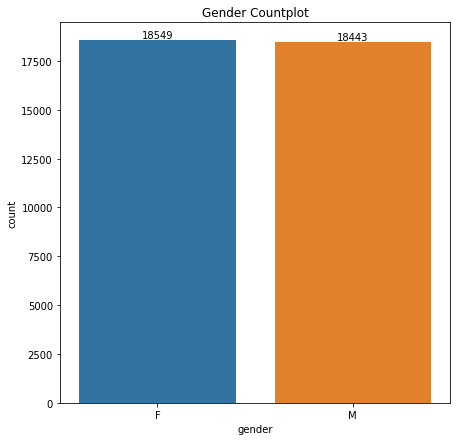

In [15]:
# make data visualization using countplot
# majority of the user is female

fig,ax1 = plt.subplots(figsize = (7,7))
graph = sns.countplot(ax = ax1 ,x = 'gender', data = df)
graph.set_xticklabels(graph.get_xticklabels())
plt.title('Gender Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['gender'].value_counts()[i], ha ="center", va = 'bottom')
    i += 1

plt.show()

Age Column

In [16]:
# categorize age into two category
# 16 - 21 = teen
# above that = adult
# and checking the missing value

teen = []
adult = []

for i in df['age']:
    if i >= 16 and i <= 21:
        teen.append(i)
    else:
        adult.append(i)
        if i == np.NaN:
            print('missing value detected')

print(f"jumlah teen = {len(teen)}")
print(f"jumlah adult = {len(adult)}")
print(f"total = {len(adult)+len(teen)}, no missing value")

# make two dataframes consist of 'teen' and 'adult' data
# concatenating the two dataframes by columns

df_teen = pd.DataFrame(teen, columns = ['teen'])
df_adult = pd.DataFrame(adult, columns = ['adult'])
df_age = pd.concat([df_teen,df_adult], axis = 1)

jumlah teen = 4018
jumlah adult = 32974
total = 36992, no missing value


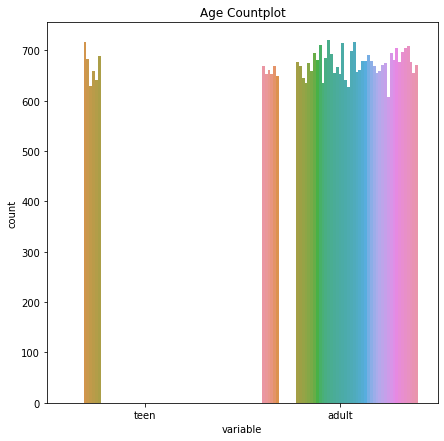

In [17]:
# make data visualization using countplot
# majority of the user is adult

fig,ax2 = plt.subplots(figsize = (7,7))
graph = sns.countplot(x = "variable", hue = "value", data = pd.melt(df_age));

ax2.get_legend().remove()
plt.title('Age Countplot');
plt.show()

In [18]:
teen1 = []
adult1 = []

for i in df1['age']:
    if i >= 16 and i <= 21:
        teen1.append(i)
    else:
        adult1.append(i)
        if i == np.NaN:
            print('missing value detected')

print(f"jumlah teen = {len(teen1)}")
print(f"jumlah adult = {len(adult1)}")
print(f"total = {len(adult1)+len(teen1)}, no missing value")

df_teen = pd.DataFrame(teen, columns = ['teen'])
df_adult = pd.DataFrame(adult, columns = ['adult'])
df_age = pd.concat([df_teen,df_adult], axis = 1)

jumlah teen = 2195
jumlah adult = 17724
total = 19919, no missing value


Region Category Column

In [19]:
# checking the data if it's clean

df['region_category'].value_counts()

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64

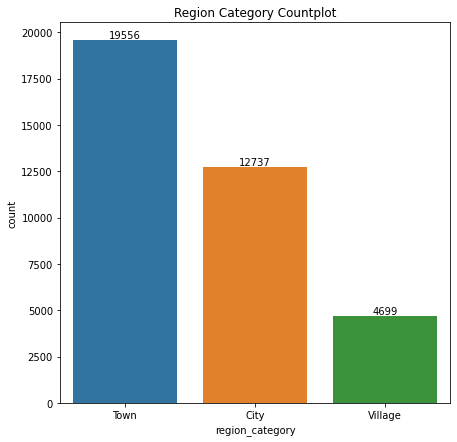

In [20]:
# make data visualization using countplot
# majority of the user's region is town - city - village

fig, ax3 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax3, x = 'region_category', order = df['region_category'].value_counts().index);
plt.title('Region Category Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['region_category'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Membership Category Column

In [21]:
# checking if the data is clean

df['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

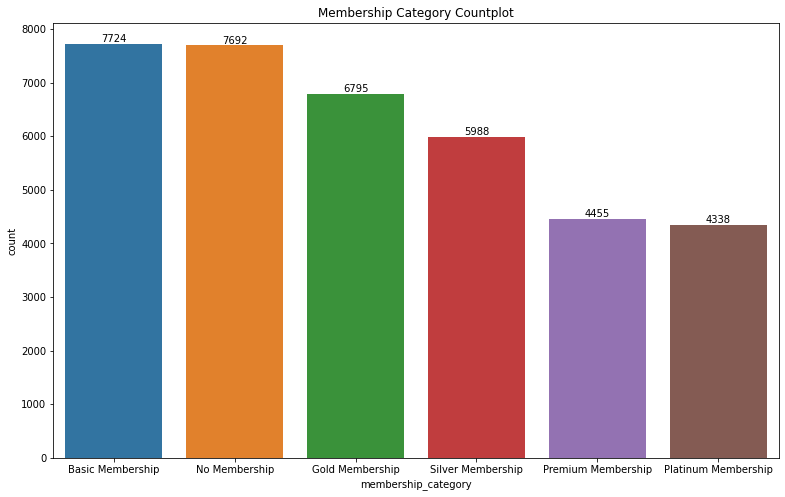

In [22]:
# data visualization using countplot
# the majority membership of the user is basic - no - gold - silver - premium - platinum

fig, ax4 = plt.subplots(figsize = (13,8))
graph = sns.countplot(data = df, ax = ax4, x = 'membership_category', order = df['membership_category'].value_counts().index);
plt.title('Membership Category Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['membership_category'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Joined Through Referral Column

In [23]:
# checking the value of this column
# turns out it has '?' data

df['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [24]:
# replacing '?' with majority data

df['joined_through_referral'].replace({'?':'No'},inplace = True)
df1['joined_through_referral'].replace({'?':'No'},inplace = True)

df['joined_through_referral'].value_counts()

No     21277
Yes    15715
Name: joined_through_referral, dtype: int64

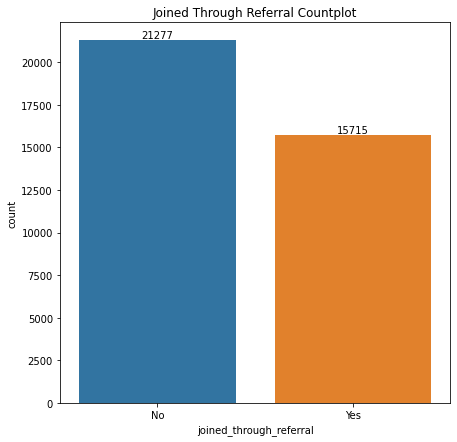

In [25]:
# data visualizing using countplot
# majority of the user didn't join through referral

fig, ax5 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax5, x = 'joined_through_referral', order = df['joined_through_referral'].value_counts().index);
plt.title('Joined Through Referral Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.1, df['joined_through_referral'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Preffered Offer Types Column

In [26]:
# checking the data if it's clean

df['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

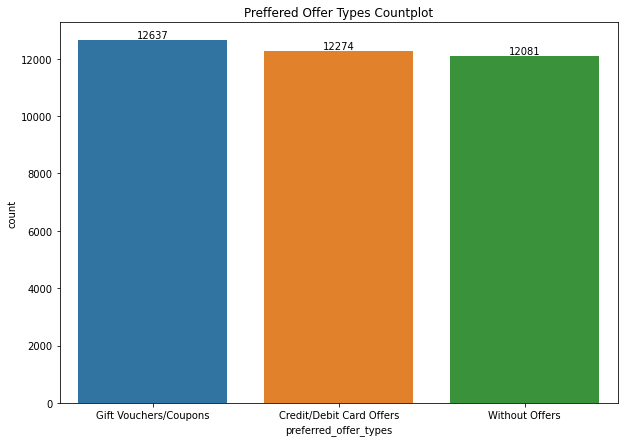

In [27]:
# data visualizing using countplot
# majority of the user prefer using gift vouchers / coupons

fig, ax6 = plt.subplots(figsize = (10,7))
graph = sns.countplot(data = df, ax = ax6, x = 'preferred_offer_types', order = df['preferred_offer_types'].value_counts().index);
plt.title('Preffered Offer Types Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['preferred_offer_types'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Medium of Operation Column

In [28]:
# checking the data if it's clean
# turns out it has '?' data

df['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [29]:
# replacing the '?' data with the majority data

df['medium_of_operation'].replace({'?':'Smartphone'},inplace=True)
df1['medium_of_operation'].replace({'?':'Smartphone'},inplace=True)

df['medium_of_operation'].value_counts()

Smartphone    19269
Desktop       13913
Both           3810
Name: medium_of_operation, dtype: int64

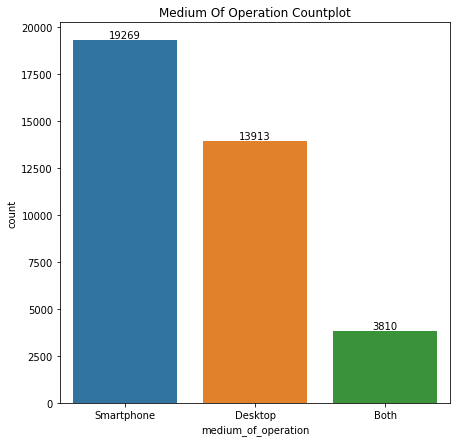

In [30]:
# data visualizing using countplot
# majority of the user uses smartphone as the medium of operation

fig, ax7 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax7, x = 'medium_of_operation', order = df['medium_of_operation'].value_counts().index);
plt.title('Medium Of Operation Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, p.get_height() + 0.1, df['medium_of_operation'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Internet Option Column

In [31]:
# checking the data if it's clean

df['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

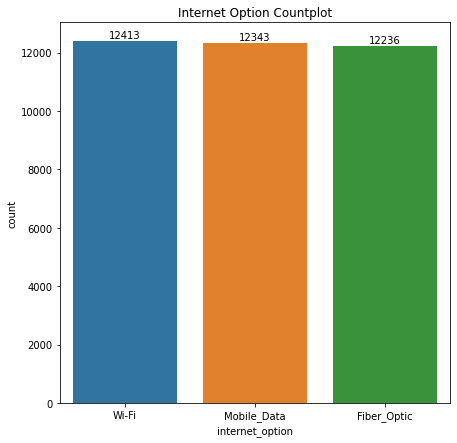

In [32]:
# visualizing data using counplot
# majority of the user uses mobile data - wifi - fiber optic as an internet option

fig, ax8 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax8, x = 'internet_option', order = df['internet_option'].value_counts().index);
plt.title('Internet Option Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['internet_option'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Day Since Last Login Column

In [33]:
# checking any negative, inf, null, and zero data

print((df[['days_since_last_login']] < 0).any())
print((df[['days_since_last_login']] == np.inf).any())
print((df[['days_since_last_login']] == -np.inf).any())
print((df[['days_since_last_login']] == np.nan).any())

days_since_last_login    True
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool


In [34]:
# replacing the negative data with median
# using log to re-fix the data distribution

med = df['days_since_last_login'].median()
df['days_since_last_login'] = np.where(df['days_since_last_login'] 
                                < 0,med,df['days_since_last_login'])

med1_1 = df1['days_since_last_login'].median()
df1['days_since_last_login'] = np.where(df1['days_since_last_login'] 
                                < 0,med1_1,df1['days_since_last_login'])

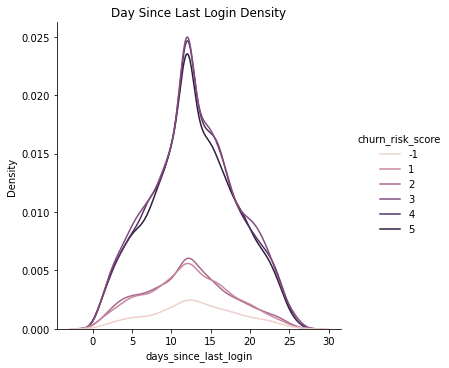

In [35]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='days_since_last_login', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Day Since Last Login Density');

Avg Time Spent Column

In [36]:
# checking any negative, inf, null, and zero data

print((df[['avg_time_spent']] < 0).any())
print((df[['avg_time_spent']] == np.inf).any())
print((df[['avg_time_spent']] == -np.inf).any())
print((df[['avg_time_spent']] == np.nan).any())

avg_time_spent    True
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool


In [37]:
# replacing the negative data with median

med2 = df['avg_time_spent'].median()
df['avg_time_spent'] = np.where(df['avg_time_spent'] 
                        < 0,med2,df['avg_time_spent'])

med2_2 = df['avg_time_spent'].median()
df1['avg_time_spent'] = np.where(df1['avg_time_spent'] 
                        < 0,med2,df1['avg_time_spent'])

In [38]:
# re-check any negative, inf, null, and zero data

print((df[['avg_time_spent']] <= 0).any())
print((df[['avg_time_spent']] == np.inf).any())
print((df[['avg_time_spent']] == -np.inf).any())
print((df[['avg_time_spent']] == np.nan).any())

avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool


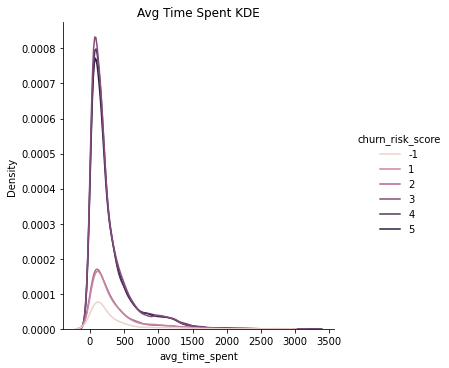

In [39]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_time_spent', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Time Spent KDE');

Avg Transaction Value Column

In [40]:
# checking any negative, inf, null, and zero data

print((df[['avg_transaction_value']] < 0).any())
print((df[['avg_transaction_value']] == np.inf).any())
print((df[['avg_transaction_value']] == -np.inf).any())
print((df[['avg_transaction_value']] == np.nan).any())

avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool


In [41]:
# using log to re-fix the data distribution

df['avg_transaction_value'] = np.log(df['avg_transaction_value'])

df1['avg_transaction_value'] = np.log(df1['avg_transaction_value'])

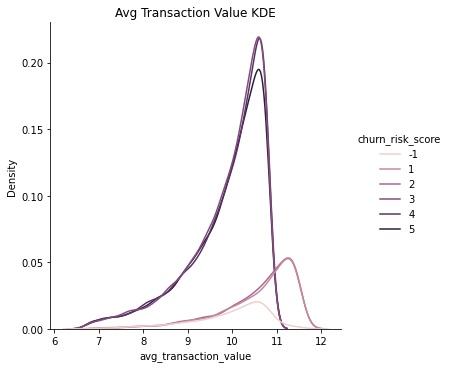

In [42]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_transaction_value', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Transaction Value KDE');

Avg Frequency Login Days Column

In [43]:
# checking the value of the column
# turns out there are 'Error' data

df['avg_frequency_login_days'].value_counts()

Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [44]:
# replacing 'Error' data with zero
# then, casting the column's data type into numeric

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] == 'Error', 
                                 0,df['avg_frequency_login_days'])
df['avg_frequency_login_days'] = pd.to_numeric(df["avg_frequency_login_days"])

df1['avg_frequency_login_days'] = np.where(df1['avg_frequency_login_days'] == 'Error', 
                                 0,df1['avg_frequency_login_days'])
df1['avg_frequency_login_days'] = pd.to_numeric(df1["avg_frequency_login_days"])

In [45]:
# checking any negative, inf, null, and zero data

print((df[['avg_frequency_login_days']] < 0).any())
print((df[['avg_frequency_login_days']] == np.inf).any())
print((df[['avg_frequency_login_days']] == -np.inf).any())
print((df[['avg_frequency_login_days']] == np.nan).any())

avg_frequency_login_days    True
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool


In [46]:
# replacing negative data with zero
# replacing zero with median
# using log to re-fix the data distribution

median0 = df['avg_frequency_login_days'].median()
df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] < 0, 
                                 median0,df['avg_frequency_login_days'])
df['avg_frequency_login_days'] = np.log(df['avg_frequency_login_days'])
df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] < 0, 
                                 median0,df['avg_frequency_login_days'])


median0_0 = df1['avg_frequency_login_days'].median()
df1['avg_frequency_login_days'] = np.where(df1['avg_frequency_login_days'] < 0, 
                                 median0_0,df1['avg_frequency_login_days'])
df1['avg_frequency_login_days'] = np.log(df1['avg_frequency_login_days'])
df1['avg_frequency_login_days'] = np.where(df1['avg_frequency_login_days'] < 0, 
                                 median0_0,df1['avg_frequency_login_days'])

In [47]:
# re-check any negative, inf, null, and zero data

print((df[['avg_frequency_login_days']] < 0).any())
print((df[['avg_frequency_login_days']] == np.inf).any())
print((df[['avg_frequency_login_days']] == -np.inf).any())
print((df[['avg_frequency_login_days']] == np.nan).any())

avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool


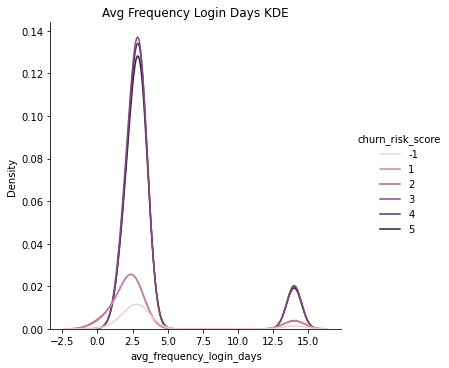

In [48]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_frequency_login_days', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Frequency Login Days KDE');

Points in Wallet Column

In [49]:
# checking any negative, inf, null, and zero data

print((df[['points_in_wallet']] < 0).any())
print((df[['points_in_wallet']] == np.inf).any())
print((df[['points_in_wallet']] == -np.inf).any())
print((df[['points_in_wallet']] == np.nan).any())

points_in_wallet    True
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool


In [50]:
median = df['points_in_wallet'].median()
df['points_in_wallet'] = np.where(df['points_in_wallet'] < 0 
                         ,median,df['points_in_wallet'])
df['points_in_wallet'] = df['points_in_wallet'].replace({np.NaN : median})
df['points_in_wallet'] = df['points_in_wallet'].replace({np.inf : median})
df['points_in_wallet'] = df['points_in_wallet'].replace({-np.inf : median})


mediann = df1['points_in_wallet'].median()
df1['points_in_wallet'] = np.where(df1['points_in_wallet'] < 0 
                         ,mediann,df1['points_in_wallet'])
df1['points_in_wallet'] = df1['points_in_wallet'].fillna(mediann)
df1['points_in_wallet'] = df1['points_in_wallet'].replace({np.inf : mediann})
df1['points_in_wallet'] = df1['points_in_wallet'].replace({-np.inf : mediann})

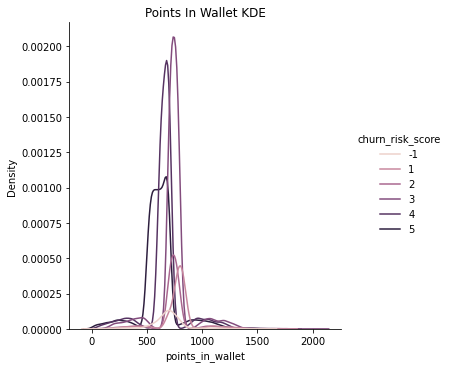

In [51]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='points_in_wallet', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Points In Wallet KDE');

Used Special Discount Column

In [52]:
# checking the value of this column

df['used_special_discount'].value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

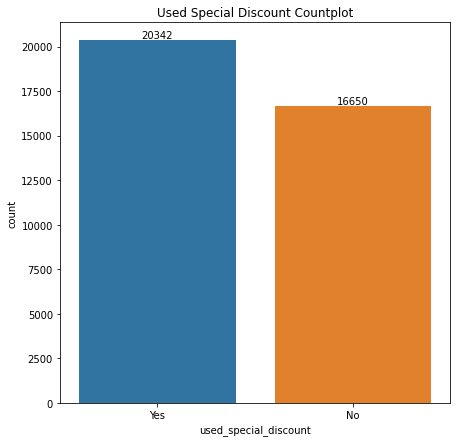

In [53]:
# visualising data using count plot
# majority of the user used special discount

fig, ax9 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax9, x = 'used_special_discount', order = df['used_special_discount'].value_counts().index);
plt.title('Used Special Discount Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['used_special_discount'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Offer Application Preference Column

In [54]:
df['offer_application_preference'].value_counts()

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

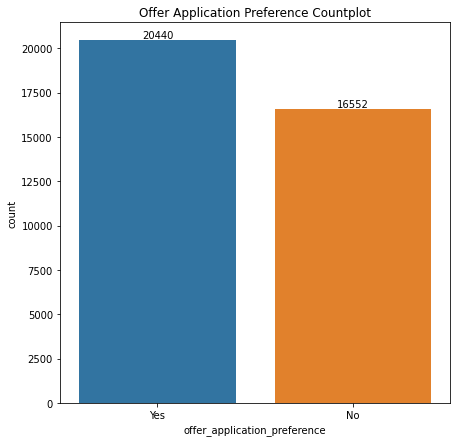

In [55]:
# visualizing data using count plot
# majority of the user prefer the application offer

fig, ax10 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax10, x = 'offer_application_preference', order = df['offer_application_preference'].value_counts().index);
plt.title('Offer Application Preference Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['offer_application_preference'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Past Complaint Column

In [56]:
# checking the value of this column

df['past_complaint'].value_counts()

No     18602
Yes    18390
Name: past_complaint, dtype: int64

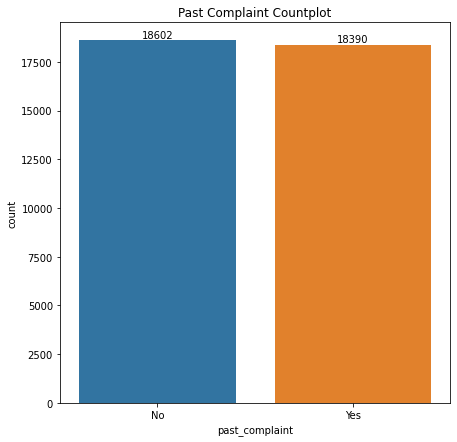

In [57]:
# visualizing the data using count plot
# majority of the user did not complaint in the past

fig, ax11 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax11, x = 'past_complaint', order = df['past_complaint'].value_counts().index);
plt.title('Past Complaint Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['past_complaint'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Complaint Status Column

In [58]:
# checking the value of this columns

df['complaint_status'].value_counts()

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64

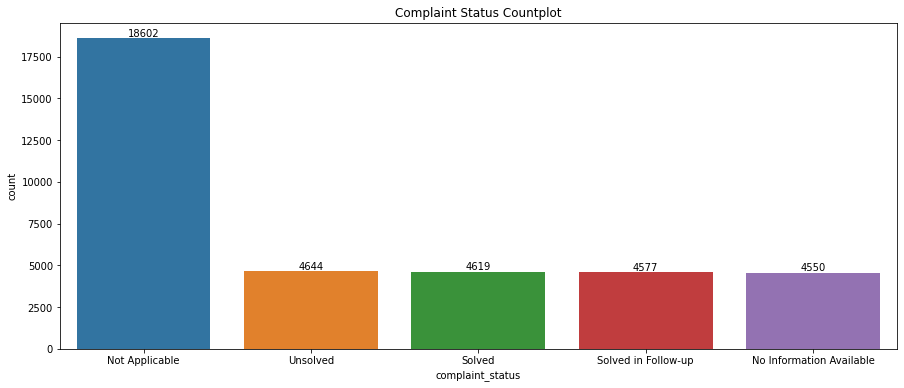

In [59]:
# visualizing the data using count plot
# majority of the complaint status is not applicable

fig, ax12 = plt.subplots(figsize = (15,6))
graph = sns.countplot(data = df, ax = ax12, x = 'complaint_status', order= df['complaint_status'].value_counts().index);
plt.title('Complaint Status Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['complaint_status'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Feedback Column

In [60]:
# checking the value of this column

df['feedback'].value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

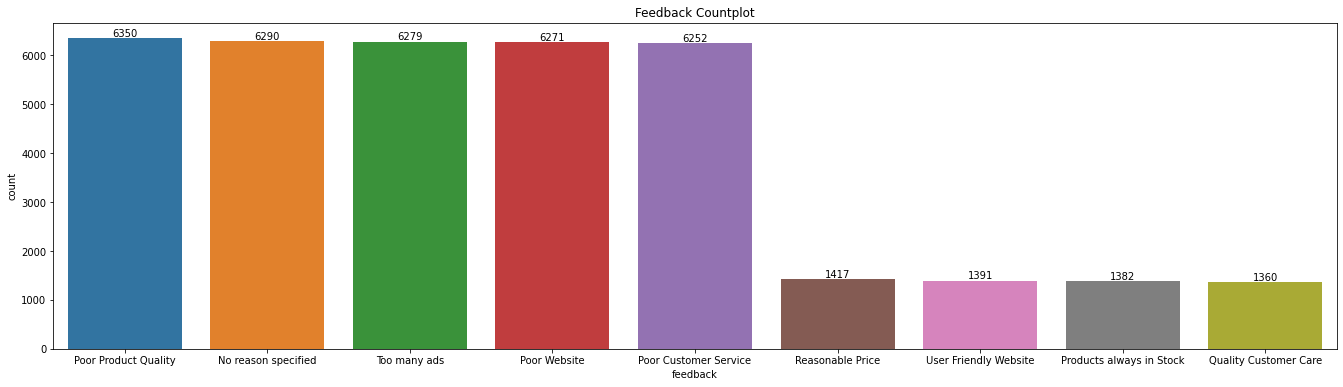

In [61]:
# visualizing data using count plot
# as you can see, there are several majority data

fig, ax13 = plt.subplots(figsize = (23,6))
graph = sns.countplot(data = df, ax = ax13, x = 'feedback', order= df['feedback'].value_counts().index);
plt.title('Feedback Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['feedback'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

**NUMERICAL CORRELATION CHECKING**

In [62]:
corr = df.corr()
pd.DataFrame(corr.iloc[:, 6])

,churn_risk_score
age,0.002360
days_since_last_login,0.020090
avg_time_spent,-0.024318
avg_transaction_value,-0.173464
avg_frequency_login_days,0.040296
points_in_wallet,-0.257012
churn_risk_score,1.000000


**DATA CASTING**

In [63]:
df = df.drop(['Name','customer_id','security_no','joining_date',
        'referral_id','last_visit_time','age'], axis=1)

df1 = df1.drop(['Name','customer_id','security_no','joining_date',
        'referral_id','last_visit_time','age'], axis=1)

In [64]:
# one hot encoding (categorical) and data casting (numerical)

df = pd.get_dummies(df, columns=['gender','region_category','membership_category',
                            'joined_through_referral','preferred_offer_types',
                            'medium_of_operation','internet_option','used_special_discount',
                            'offer_application_preference','past_complaint',
                            'complaint_status','feedback'], prefix='', prefix_sep='')

df['days_since_last_login'] = df['days_since_last_login'].astype(np.int64)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(np.int64)
df['avg_time_spent'] = df['avg_time_spent'].astype(np.int64)
df['avg_transaction_value'] = df['avg_transaction_value'].astype(np.int64)
df['points_in_wallet'] = df['points_in_wallet'].astype(np.int64)
df['churn_risk_score'] = df['churn_risk_score'].astype(np.int64)


df1 = pd.get_dummies(df1, columns=['gender','region_category','membership_category',
                            'joined_through_referral','preferred_offer_types',
                            'medium_of_operation','internet_option','used_special_discount',
                            'offer_application_preference','past_complaint',
                            'complaint_status','feedback'], prefix='', prefix_sep='')

df1['days_since_last_login'] = df1['days_since_last_login'].astype(np.int64)
df1['avg_frequency_login_days'] = df1['avg_frequency_login_days'].astype(np.int64)
df1['avg_time_spent'] = df1['avg_time_spent'].astype(np.int64)
df1['avg_transaction_value'] = df1['avg_transaction_value'].astype(np.int64)
df1['points_in_wallet'] = df1['points_in_wallet'].astype(np.int64)

**MODELLING**

In [65]:
# label encoding
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, df.columns != 'churn_risk_score'].values
y = df.iloc[:, df.columns == 'churn_risk_score'].values

le = LabelEncoder()
y = le.fit_transform(y)

DATA SPLITTING

In [66]:
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

'''
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

X_validation = scale_X.transform(df1.values)
'''

trans = RobustScaler()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

X_validation = trans.transform(df1.values)


Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, mean_absolute_error

model_rf = RandomForestClassifier(n_estimators = 150, random_state = 0, max_depth = 6) 
 
model_rf.fit(X_smote, y_smote)
 
y_pred_rf = model_rf.predict(X_test)
pred = pd.DataFrame(y_pred_rf, columns=['predict'])

accuracy = metrics.accuracy_score(y_test,y_pred_rf)

print("Accuracy of Random Forest Model is: ", "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print()

print("F1-score :", "{:.2f}".format(f1_score(y_true=y_test,y_pred=y_pred_rf,average='macro')))

print(f"MEA:", "{:.2f}".format(mean_absolute_error(y_test, y_pred_rf)))

Accuracy of Random Forest Model is:  74.10 %

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       422
           1       0.72      0.75      0.74       920
           2       0.74      0.74      0.74       937
           3       0.86      0.92      0.89      3635
           4       0.79      0.40      0.53      3589
           5       0.64      1.00      0.78      3445

    accuracy                           0.74     12948
   macro avg       0.63      0.63      0.61     12948
weighted avg       0.74      0.74      0.71     12948

[[   0   26   17  130   76  173]
 [   0  689  226    0    5    0]
 [   0  237  694    0    6    0]
 [   0    0    0 3342  293    0]
 [   0    0    0  393 1424 1772]
 [   0    0    0    0    0 3445]]

F1-score : 0.61
MEA: 0.35


In [68]:
y_valid = model_rf.predict(X_validation)

test_score_clf = pd.DataFrame(y_valid,columns=['churn_risk_score'])

df_test_clf = pd.read_csv('TEST_CHURN.csv')

df_res_clf = pd.DataFrame(df_test_clf['customer_id'],columns=['customer_id'])
df_res_clf = pd.concat([df_res_clf, test_score_clf],axis=1)

df_res_clf.to_csv('Churn_risk_final_submission_RF.csv')

XGBOOST

In [72]:
import xgboost 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, mean_absolute_error

modelXGB = XGBClassifier(booster='gbtree', eval_metric='merror', max_depth = 6, n_estimators = 150)
modelXGB.fit(X_smote, y_smote)

y_pred_xgb = modelXGB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
print('Accuracy of XGBoost model is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
print()

print("F1-score :", "{:.2f}".format(f1_score(y_true=y_test,y_pred=y_pred_xgb,average='macro')))

print(f"MEA:", "{:.2f}".format(mean_absolute_error(y_test, y_pred_xgb)))

Accuracy of XGBoost model is 75.08 %

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       422
           1       0.71      0.77      0.74       920
           2       0.74      0.72      0.73       937
           3       0.86      0.92      0.89      3635
           4       0.68      0.60      0.64      3589
           5       0.71      0.83      0.76      3445

    accuracy                           0.75     12948
   macro avg       0.62      0.64      0.63     12948
weighted avg       0.72      0.75      0.74     12948

[[   0   24   20  137  108  133]
 [   0  705  215    0    0    0]
 [   0  261  676    0    0    0]
 [   3    0    0 3335  297    0]
 [   2    0    0  387 2148 1052]
 [   0    0    0    0  588 2857]]

F1-score : 0.63
MEA: 0.34


In [73]:
y_valid = modelXGB.predict(X_validation)

test_score_xgb = pd.DataFrame(y_valid,columns=['churn_risk_score'])

df_test_xgb = pd.read_csv('TEST_CHURN.csv')

df_res_xgb = pd.DataFrame(df_test_xgb['customer_id'],columns=['customer_id'],)
df_res_xgb = pd.concat([df_res_xgb, test_score_xgb],axis=1)
df_res_xgb.to_csv('Churn_risk_final_submission_XGB.csv')